In [1]:
!pip install evaluate rouge_score bert-score

In [2]:
import pandas as pd
import re

In [7]:
# Load the CSV file
df = pd.read_csv("eval_all_qwen.csv")
df.head()

,Unnamed: 0,id,text,reference-summary,previous-summary-no-shot,previous-summary-one-shot,previous-summary-few-shot,current-summary
0,0,orangesum-4248,Sans masque mais gel hydroalcoolique à portée ...,"Dans l'intimité des châteaux, à Margaux, Saint...",Résumez cet article \n<article>: Sans masque ...,Voici l'exemples d' un article et son résumé :...,Voici des exemples d'articles et leurs résumés...,Résumez cet article \n<article>: Sans masque ...
1,1,orangesum-1152,"Agé d'une soixantaine d'année, le suspect s'es...",Un différend familial est à l'origine du drame...,Résumez cet article \n<article>: Agé d'une so...,Voici l'exemples d' un article et son résumé :...,Voici des exemples d'articles et leurs résumés...,Résumez cet article \n<article>: Agé d'une so...
2,2,orangesum-3846,"""Oui, le travail de refondation n'est pas ache...","Le premier secrétaire du PS, Olivier Faure, a ...","Résumez cet article \n<article>: ""Oui, le tra...",Voici l'exemples d' un article et son résumé :...,Voici des exemples d'articles et leurs résumés...,"Résumez cet article \n<article>: ""Oui, le tra..."
3,3,orangesum-148,"Pour Antoine, un mois, c'est une course contre...","Ce nourrisson d'un mois, victime d'une défaill...",Résumez cet article \n<article>: Pour Antoine...,Voici l'exemples d' un article et son résumé :...,Voici des exemples d'articles et leurs résumés...,Résumez cet article \n<article>: Pour Antoine...
4,4,orangesum-4784,"Une ""leçon politique"". Voilà ce qu'ont appris ...",Le président du groupe LR au Sénat a réagi lun...,"Résumez cet article \n<article>: Une ""leçon p...",Voici l'exemples d' un article et son résumé :...,Voici des exemples d'articles et leurs résumés...,"Résumez cet article \n<article>: Une ""leçon p..."


In [8]:
df_ins = pd.read_csv("eval_all_qwen_instruct.csv")
df_ins.head()

,id,text,reference-summary,current-summary,previous-summary-no-shot,previous-summary-one-shot,previous-summary-few-shot
0,orangesum-1761,"Le phénomène astronomique, qui ne se produit q...","Sortez les appareils photos, mais protégez vos...",Résumez cet article \n<article>: Le phénomène...,Résumez cet article \n<article>: Le phénomène...,Voici l'exemple d' un article et son résumé :\...,Voici des exemples d'articles et leurs résumés...
1,orangesum-1510,Ce n'est pas encore un reconfinement en bonne ...,Le gouvernement régional de la Catalogne a dem...,Résumez cet article \n<article>: Ce n'est pas...,Résumez cet article \n<article>: Ce n'est pas...,Voici l'exemple d' un article et son résumé :\...,Voici des exemples d'articles et leurs résumés...
2,orangesum-2807,"Le gouvernement a dévoilé jeudi son plan ""Plac...",Le gouvernement a annoncé ce jeudi 28 juin plu...,Résumez cet article \n<article>: Le gouvernem...,Résumez cet article \n<article>: Le gouvernem...,Voici l'exemple d' un article et son résumé :\...,Voici des exemples d'articles et leurs résumés...
3,orangesum-1831,"""Nous n'avons plus le temps d'attendre"". Voici...",Dans une tribune publiée dans le Journal du di...,"Résumez cet article \n<article>: ""Nous n'avon...","Résumez cet article \n<article>: ""Nous n'avon...",Voici l'exemple d' un article et son résumé :\...,Voici des exemples d'articles et leurs résumés...
4,orangesum-3737,"-En fin de soirée, en costume gris moiré, Mado...",- Les critiques ont plu sur Madonna dimanche a...,Résumez cet article \n<article>: -En fin de s...,Résumez cet article \n<article>: -En fin de s...,Voici l'exemple d' un article et son résumé :\...,Voici des exemples d'articles et leurs résumés...


In [9]:
# Function to extract text after <résumé> until the first line break
def extract_summary(text):
    if pd.isna(text):  # Handle missing values
        return ""
    match = re.search(r"<résumé>\s*:\s*(.*?)\s*(?:\n|$)", text, re.DOTALL)
    return match.group(1).strip() if match else ""

In [10]:
column_names = ['previous-summary-no-shot', 'previous-summary-one-shot', 'previous-summary-few-shot', 'current-summary']

In [11]:
for column in column_names:
    df[column] = df[column].astype(str).apply(extract_summary)
    empty_count = (df[column] == "").sum()
    print(f"Number of empty values in {column}: {empty_count}")

# Save the updated dataframe
df.to_csv("cleaned_eval_data_qwen.csv", index=False)

Number of empty values in previous-summary-no-shot: 0
Number of empty values in previous-summary-one-shot: 0
Number of empty values in previous-summary-few-shot: 0
Number of empty values in current-summary: 0


In [12]:
for column in column_names:
    df_ins[column] = df_ins[column].astype(str).apply(extract_summary)
    empty_count = (df_ins[column] == "").sum()
    print(f"Number of empty values in {column}: {empty_count}")

# Save the updated dataframe
df_ins.to_csv("cleaned_eval_data_qwen_ins.csv", index=False)

Number of empty values in previous-summary-no-shot: 0
Number of empty values in previous-summary-one-shot: 0
Number of empty values in previous-summary-few-shot: 0
Number of empty values in current-summary: 0


In [26]:
df_ins = pd.read_csv("cleaned_eval_data_qwen_ins.csv")
df_ins.head()

,id,text,reference-summary,current-summary,previous-summary-no-shot,previous-summary-one-shot,previous-summary-few-shot
0,orangesum-1761,"Le phénomène astronomique, qui ne se produit q...","Sortez les appareils photos, mais protégez vos...",Le Soleil est fréquentable pendant environ un ...,"Un événement astronomique, qui ne se produit q...",Une nouvelle découverte scientifique pourrait ...,"Une nouvelle ère de lumières à venir, mais la ..."
1,orangesum-1510,Ce n'est pas encore un reconfinement en bonne ...,Le gouvernement régional de la Catalogne a dem...,Les habitants de Barcelone et d'une grande par...,Ce n'est pas encore une reconfinement en bonne...,Les commerces non essentiels doivent recevoir ...,Les commerces et restaurants peuvent rester fe...
2,orangesum-2807,"Le gouvernement a dévoilé jeudi son plan ""Plac...",Le gouvernement a annoncé ce jeudi 28 juin plu...,"Le gouvernement a annoncé jeudi sa planche ""Pl...",Le gouvernement a dévoile un plan de promotion...,Le gouvernement français a annoncé mercredi 18...,L'objectif est de promouvoir le solaire au-del...
3,orangesum-1831,"""Nous n'avons plus le temps d'attendre"". Voici...",Dans une tribune publiée dans le Journal du di...,Les 16 personnes signatairent aujourd'hui du p...,"""Nous n'avons plus le temps d'attendre"". Le jo...",Un réseau d'escroquerie qui vendait des voitur...,"Les 16 membres du journaliste syndicaliste, le..."
4,orangesum-3737,"-En fin de soirée, en costume gris moiré, Mado...",- Les critiques ont plu sur Madonna dimanche a...,Les deux titres interprétés par Madonna ont eu...,"-Madonna a entonné ""Nothing Compares 2 U"" avan...",Les artistes de Madonna ont été dénoncés par S...,Les artistes de Prince ont été détenus après l...


In [27]:
df = pd.read_csv("cleaned_eval_data_qwen.csv")
df.head()

,Unnamed: 0,id,text,reference-summary,previous-summary-no-shot,previous-summary-one-shot,previous-summary-few-shot,current-summary
0,0,orangesum-4248,Sans masque mais gel hydroalcoolique à portée ...,"Dans l'intimité des châteaux, à Margaux, Saint...",Sans masque mais gel hydroalcoolique à portée ...,Les premiers vins de Bordeaux ont été vendus à...,Le 2019 a vu la saison 7 de Danse avec les sta...,Le 2019 est un millésime très complexe et diff...
1,1,orangesum-1152,"Agé d'une soixantaine d'année, le suspect s'es...",Un différend familial est à l'origine du drame...,"Agé d'une soixantaine d'année, le suspect s'es...",Le suspect a été agressé à coups de couteaux p...,Un homme d'une cinquantaine d'années a été ass...,Une enquête a été lancée à Angoulême sur l'ass...
2,2,orangesum-3846,"""Oui, le travail de refondation n'est pas ache...","Le premier secrétaire du PS, Olivier Faure, a ...","""Oui, le travail de refondation n'est pas ache...","""La liste de M. Hamon, qui n'a pas obtenu le s...","""Je suis très content de vous avoir rencontré....",M. Faure a confirmé que le PS ne va pas souten...
3,3,orangesum-148,"Pour Antoine, un mois, c'est une course contre...","Ce nourrisson d'un mois, victime d'une défaill...","Pour Antoine, un mois, c'est une course contre...","La famille de l'enfant malade, Antoine, a été ...","Le bébé Antoine, qui a eu une maladie cardiaqu...","Un mois, c'est une course contre la montre qui..."
4,4,orangesum-4784,"Une ""leçon politique"". Voilà ce qu'ont appris ...",Le président du groupe LR au Sénat a réagi lun...,"Une ""leçon politique"". L'année 2021 a été un ""...","La droite a fait ""trois"" leçons, dans la régio...","Le sénateur LR, Bruno Retailleau, a réagi lund...","Bruno Retailleau, sénateur LR, a réagi lundi 2..."


In [14]:
import evaluate

# Load ROUGE metric
rouge = evaluate.load("rouge")

# Function to compute ROUGE scores
def compute_rouge(predictions, references, label):
    results = rouge.compute(predictions=predictions, references=references)
    print(f"ROUGE Scores for {label}: {results}")
    return results

# Compute ROUGE for different summaries for Qwen
rouge_no_shot = compute_rouge(df["previous-summary-no-shot"].tolist(), df["reference-summary"].tolist(), "previous-summary-no-shot")
rouge_one_shot = compute_rouge(df["previous-summary-one-shot"].tolist(), df["reference-summary"].tolist(), "previous-summary-one-shot")
rouge_few_shot = compute_rouge(df["previous-summary-few-shot"].tolist(), df["reference-summary"].tolist(), "previous-summary-few-shot")
rouge_fine_tuned = compute_rouge(df["current-summary"].tolist(), df["reference-summary"].tolist(), "current-summary")

# Optional: Store results in a dictionary if needed for further analysis
rouge_results = {
    "previous-summary-no-shot": rouge_no_shot,
    "previous-summary-one-shot": rouge_one_shot,
    "previous-summary-few-shot": rouge_few_shot,
    "current-summary": rouge_fine_tuned
}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ROUGE Scores for previous-summary-no-shot: {'rouge1': 0.20263025325866946, 'rouge2': 0.06014049568539016, 'rougeL': 0.1306942300214904, 'rougeLsum': 0.1305169966749532}
ROUGE Scores for previous-summary-one-shot: {'rouge1': 0.18897863178432678, 'rouge2': 0.0454568386740214, 'rougeL': 0.1258369359579995, 'rougeLsum': 0.12588605765059485}
ROUGE Scores for previous-summary-few-shot: {'rouge1': 0.18581502365050284, 'rouge2': 0.046538222629116985, 'rougeL': 0.12558439645562897, 'rougeLsum': 0.12570440877241523}
ROUGE Scores for current-summary: {'rouge1': 0.2623165515996624, 'rouge2': 0.08443781761600651, 'rougeL': 0.16968721462876352, 'rougeLsum': 0.16961810624394422}


In [15]:
# Compute ROUGE for different summaries for Qwen Instruct
rouge_no_shot_ins = compute_rouge(df_ins["previous-summary-no-shot"].tolist(), df_ins["reference-summary"].tolist(), "previous-summary-no-shot")
rouge_one_shot_ins = compute_rouge(df_ins["previous-summary-one-shot"].tolist(), df_ins["reference-summary"].tolist(), "previous-summary-one-shot")
rouge_few_shot_ins = compute_rouge(df_ins["previous-summary-few-shot"].tolist(), df_ins["reference-summary"].tolist(), "previous-summary-few-shot")
rouge_fine_tuned_ins = compute_rouge(df_ins["current-summary"].tolist(), df_ins["reference-summary"].tolist(), "current-summary")

# Optional: Store results in a dictionary if needed for further analysis
rouge_results_ins = {
    "previous-summary-no-shot": rouge_no_shot_ins,
    "previous-summary-one-shot": rouge_one_shot_ins,
    "previous-summary-few-shot": rouge_few_shot_ins,
    "current-summary": rouge_fine_tuned_ins
}

ROUGE Scores for previous-summary-no-shot: {'rouge1': 0.1861187516844454, 'rouge2': 0.041752473327215156, 'rougeL': 0.1214759176969086, 'rougeLsum': 0.1215989740584415}
ROUGE Scores for previous-summary-one-shot: {'rouge1': 0.18083742401532105, 'rouge2': 0.03719527978126031, 'rougeL': 0.1190919354388667, 'rougeLsum': 0.11889793656454001}
ROUGE Scores for previous-summary-few-shot: {'rouge1': 0.18705263561677127, 'rouge2': 0.03700709093626732, 'rougeL': 0.12339808851686623, 'rougeLsum': 0.12341480893036952}
ROUGE Scores for current-summary: {'rouge1': 0.21775399816394858, 'rouge2': 0.05895525603314519, 'rougeL': 0.1406550099840264, 'rougeLsum': 0.14051980828765606}


In [19]:
import matplotlib.pyplot as plt
import numpy as np

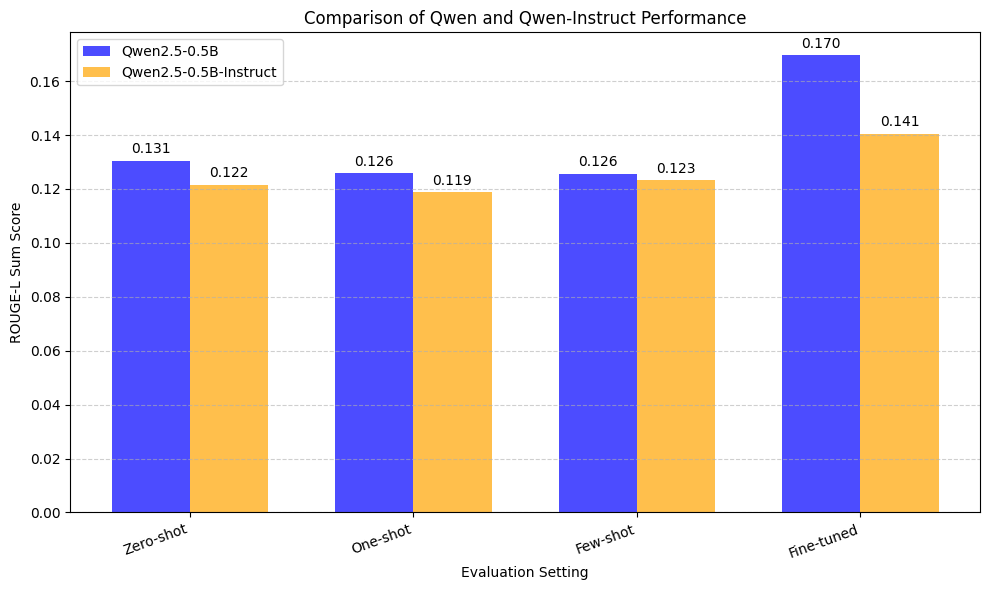

In [24]:
# Extract labels and values
categories = list(rouge_results.keys())
qwen_scores = [rouge_results[cat]['rougeLsum'] for cat in categories]  # Change to rouge1, rouge2 if needed
qwen_ins_scores = [rouge_results_ins[cat]['rougeLsum'] for cat in categories]

# Bar width and positions
x = np.arange(len(categories))
bar_width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, qwen_scores, bar_width, label="Qwen2.5-0.5B", color="blue", alpha=0.7)
bars2 = ax.bar(x + bar_width/2, qwen_ins_scores, bar_width, label="Qwen2.5-0.5B-Instruct", color="orange", alpha=0.7)


category_names = ["Zero-shot", "One-shot", "Few-shot", "Fine-tuned"]
# Labels and formatting
ax.set_xlabel("Evaluation Setting")
ax.set_ylabel("ROUGE-L Sum Score")
ax.set_title("Comparison of Qwen and Qwen-Instruct Performance")
ax.set_xticks(x)
ax.set_xticklabels(category_names, rotation=20, ha="right")
ax.legend()
ax.grid(axis='y', linestyle="--", alpha=0.6)

# Show values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',  # Format to 3 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import evaluate

# Load BERTScore metric
bertscore = evaluate.load("bertscore")

In [31]:


# Compute BERTScore for previous-summary-no-shot
bertscore_no_shot = bertscore.compute(
    predictions=df_ins["previous-summary-no-shot"].tolist(),
    references=df_ins["reference-summary"].tolist(),
    lang="fr"  # Set to "fr" for French or adjust based on your dataset language
)

# Compute BERTScore for previous-summary-one-shot
bertscore_one_shot = bertscore.compute(
    predictions=df_ins["previous-summary-one-shot"].tolist(),
    references=df_ins["reference-summary"].tolist(),
    lang="fr"
)

# Compute BERTScore for previous-summary-few-shot
bertscore_few_shot = bertscore.compute(
    predictions=df_ins["previous-summary-few-shot"].tolist(),
    references=df_ins["reference-summary"].tolist(),
    lang="fr"
)

# Print BERTScore results
print("BERTScore for Previous Summary (No-shot):")
print(f"P: {sum(bertscore_no_shot['precision'])/len(bertscore_no_shot['precision'])}, "
      f"R: {sum(bertscore_no_shot['recall'])/len(bertscore_no_shot['recall'])}, "
      f"F1: {sum(bertscore_no_shot['f1'])/len(bertscore_no_shot['f1'])}")

print("\nBERTScore for Previous Summary (One-shot):")
print(f"P: {sum(bertscore_one_shot['precision'])/len(bertscore_one_shot['precision'])}, "
      f"R: {sum(bertscore_one_shot['recall'])/len(bertscore_one_shot['recall'])}, "
      f"F1: {sum(bertscore_one_shot['f1'])/len(bertscore_one_shot['f1'])}")

print("\nBERTScore for Previous Summary (Few-shot):")
print(f"P: {sum(bertscore_few_shot['precision'])/len(bertscore_few_shot['precision'])}, "
      f"R: {sum(bertscore_few_shot['recall'])/len(bertscore_few_shot['recall'])}, "
      f"F1: {sum(bertscore_few_shot['f1'])/len(bertscore_few_shot['f1'])}")

BERTScore for Previous Summary (No-shot):
P: 0.6549057161211967, R: 0.6756879608631134, F1: 0.6641555461287498

BERTScore for Previous Summary (One-shot):
P: 0.6562301315665245, R: 0.6762674242258072, F1: 0.6654271446466445

BERTScore for Previous Summary (Few-shot):
P: 0.6651497328281403, R: 0.6765229281187057, F1: 0.6699987807273865


In [32]:
# Compute BERTScore for previous-summary-few-shot
bertscore_few_shot = bertscore.compute(
    predictions=df_ins["current-summary"].tolist(),
    references=df_ins["reference-summary"].tolist(),
    lang="fr"
)

print("\nBERTScore for generated summary:")
print(f"P: {sum(bertscore_few_shot['precision'])/len(bertscore_few_shot['precision'])}, "
      f"R: {sum(bertscore_few_shot['recall'])/len(bertscore_few_shot['recall'])}, "
      f"F1: {sum(bertscore_few_shot['f1'])/len(bertscore_few_shot['f1'])}")


BERTScore for generated summary:
P: 0.6549031302332878, R: 0.6951242692470551, F1: 0.6737928462028503


In [33]:
bert_precision = {}
bert_recall = {}
bert_f1 = {}

In [34]:
bert_precision['qwen-gen'] = {
    "Zero-shot": 0.6304,
    "One-shot": 0.6321,
    "Few-shot": 0.6336,
    "Fine-tuned": 0.6928
}

bert_precision['qwen-ins'] = {
    "Zero-shot": 0.6549,
    "One-shot": 0.6562,
    "Few-shot": 0.6651,
    "Fine-tuned": 0.6549
}

bert_recall['qwen-gen'] = {
    "Zero-shot": 0.6910,
    "One-shot": 0.6744,
    "Few-shot": 0.6704,
    "Fine-tuned": 0.7100
}

bert_recall['qwen-ins'] = {
    "Zero-shot": 0.6757,
    "One-shot": 0.6763,
    "Few-shot": 0.6765,
    "Fine-tuned": 0.6951
}

bert_f1['qwen-gen'] = {
    "Zero-shot": 0.6584,
    "One-shot": 0.6517,
    "Few-shot": 0.6504,
    "Fine-tuned": 0.7000
}

bert_f1['qwen-ins'] = {
    "Zero-shot": 0.6642,
    "One-shot": 0.6654,
    "Few-shot": 0.6700,
    "Fine-tuned": 0.6738
}

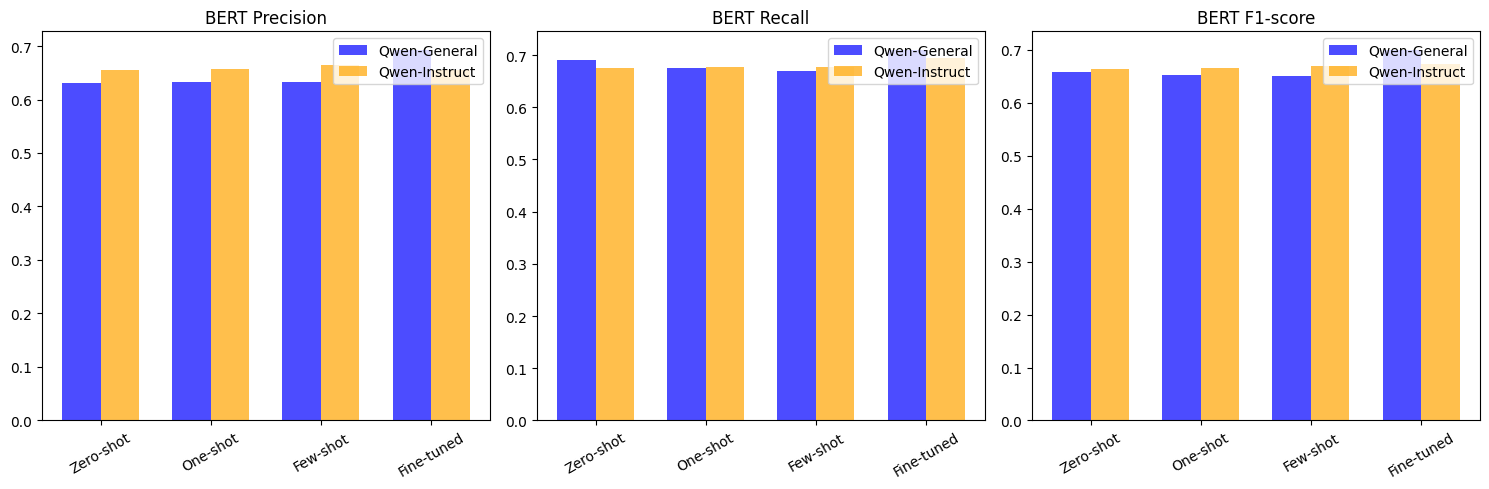

In [38]:
# Settings
categories = ["Zero-shot", "One-shot", "Few-shot", "Fine-tuned"]
x = np.arange(len(categories))  # X-axis positions
width = 0.35  # Bar width

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Precision
axes[0].bar(x - width/2, bert_precision["qwen-gen"].values(), width, label="Qwen-General", color="blue", alpha=0.7)
axes[0].bar(x + width/2, bert_precision["qwen-ins"].values(), width, label="Qwen-Instruct", color="orange", alpha=0.7)
axes[0].set_title("BERT Precision")
axes[0].set_xticks(x)
axes[0].set_xticklabels(categories, rotation=30)
axes[0].legend()

# Plot Recall
axes[1].bar(x - width/2, bert_recall["qwen-gen"].values(), width, label="Qwen-General", color="blue", alpha=0.7)
axes[1].bar(x + width/2, bert_recall["qwen-ins"].values(), width, label="Qwen-Instruct", color="orange", alpha=0.7)
axes[1].set_title("BERT Recall")
axes[1].set_xticks(x)
axes[1].set_xticklabels(categories, rotation=30)
axes[1].legend()

# Plot F1-score
axes[2].bar(x - width/2, bert_f1["qwen-gen"].values(), width, label="Qwen-General", color="blue", alpha=0.7)
axes[2].bar(x + width/2, bert_f1["qwen-ins"].values(), width, label="Qwen-Instruct", color="orange", alpha=0.7)
axes[2].set_title("BERT F1-score")
axes[2].set_xticks(x)
axes[2].set_xticklabels(categories, rotation=30)
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.savefig("bert_comparison.png")  # Save for LaTeX
plt.show()